In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result = np.zeros((12,40,800))
i=0

In [3]:
#months = [f"{x:02d}" for x in range(7,10)]
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(141,181)]

for yi,yy in enumerate(years):
    for mi,mm in enumerate(months):
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[248:343,600:1400]
        latt = latt[248:343,600:1400]
        plotvar = plotvar[30,248:343,600:1400]
        #plotvar.mask = ma.nomask
        #plotvar[plotvar >300] = np.nan
        #plotvar.mask = ma.nomask
        aveplot = plotvar.mean(axis=0)
        #aveplot = aveplot.mean(axis=0)
        result[mi,yi,:] = aveplot[:]
    
        
   

In [4]:
ave = result.mean(axis =1)


In [5]:
ave.shape

(12, 800)

In [6]:
avefi = result - ave[:,np.newaxis,:]

In [15]:
avefi.shape

(12, 40, 800)

In [8]:
re = np.zeros((480,800))

In [9]:
a = [f"{x:02d}" for x in range(0,40)]
b = [f"{x:02d}" for x in range(0,12)]
i=0
for ii,aa in enumerate(a):
    for ll,bb in enumerate(b):
        re[i,:] = avefi[ll,ii,:]
        i=i+1

In [10]:
re.shape

(480, 800)

In [11]:
A = np.arange(12)
B = np.arange(800)
xx, yy = np.meshgrid(B, A)

In [12]:
nice_cmap=sns.diverging_palette(245, 10, n=30,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([10,20,30,40,50,70,90,110,120,130,150,160,170,180,185,190,\
                      195,200,205,210,215,220,225,230,235,250]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'20'}
#nice_levels = [-1.5,-0.8,-0.4,-0.1,0,0.1,0.4,0.8,1.5]
#nice_levels = [-0.1,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
#nice_levels = [-0.6,-0.58,-0.56,-0.54,-0.52,-0.5,-0.48,-0.46,-0.44,-0.42,-0.4,-0.38,-0.36,-0.34,-0.32,-0.3,-0.28,-0.26]
#nice_levels = [-1.75,-1.7,-1.65,-1.6,-1.55,-1.5,-1.45,-1.4,-1,-0.8,-0.4,-0.1] # for top 55m
nice_levels = [-1.6,-1.5,-1.3,-1.2,-1.1,-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#bar_levels = [-0.9,-0.6,-0.3,0,0.3,0.6,0.9,1.2,1.5]

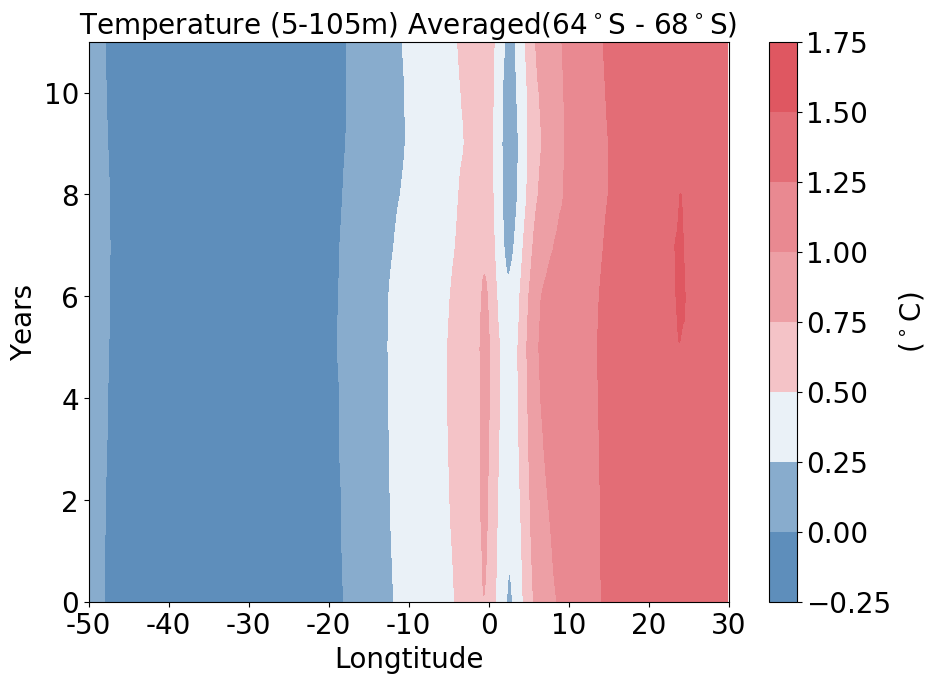

In [14]:
# plot the result
fig = plt.figure(figsize=(10, 7),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, ave, cmap = new_cmap)#,norm =norm,spacing = 'uniform',\
                  #levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#plt.vlines(530, 0, 479, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0)#,ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('($^\circ$C)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,801,100), ['-50','-40','-30', '-20', '-10', '0','10','20','30'],**my_font)
#plt.yticks(range(0,480,60), ['140', '145', '150', '155', '160','165','170','175','180'],**my_font)
plt.yticks(range(0,12,2), ['0', '2', '4', '6', '8','10','12'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Temperature (5-105m) Averaged(64$^\circ$S - 68$^\circ$S)',**my_font)
plt.savefig("tem95.png")